# Arboles de Decisión

**Dataset Utilizado:** Titanic Dataset (predicción de supervivencia).

**Carga y Preprocesamiento de Datos:**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset
df = pd.read_csv('data/titanic.csv')

# Seleccionar características relevantes
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Manejar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificar variables categóricas
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separar características y variable objetivo
X = df[features]
y = df['Survived']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


**Entrenamiento del Modelo:**

In [2]:
# Crear y entrenar el árbol de decisión
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

**Visualización del Árbol:**

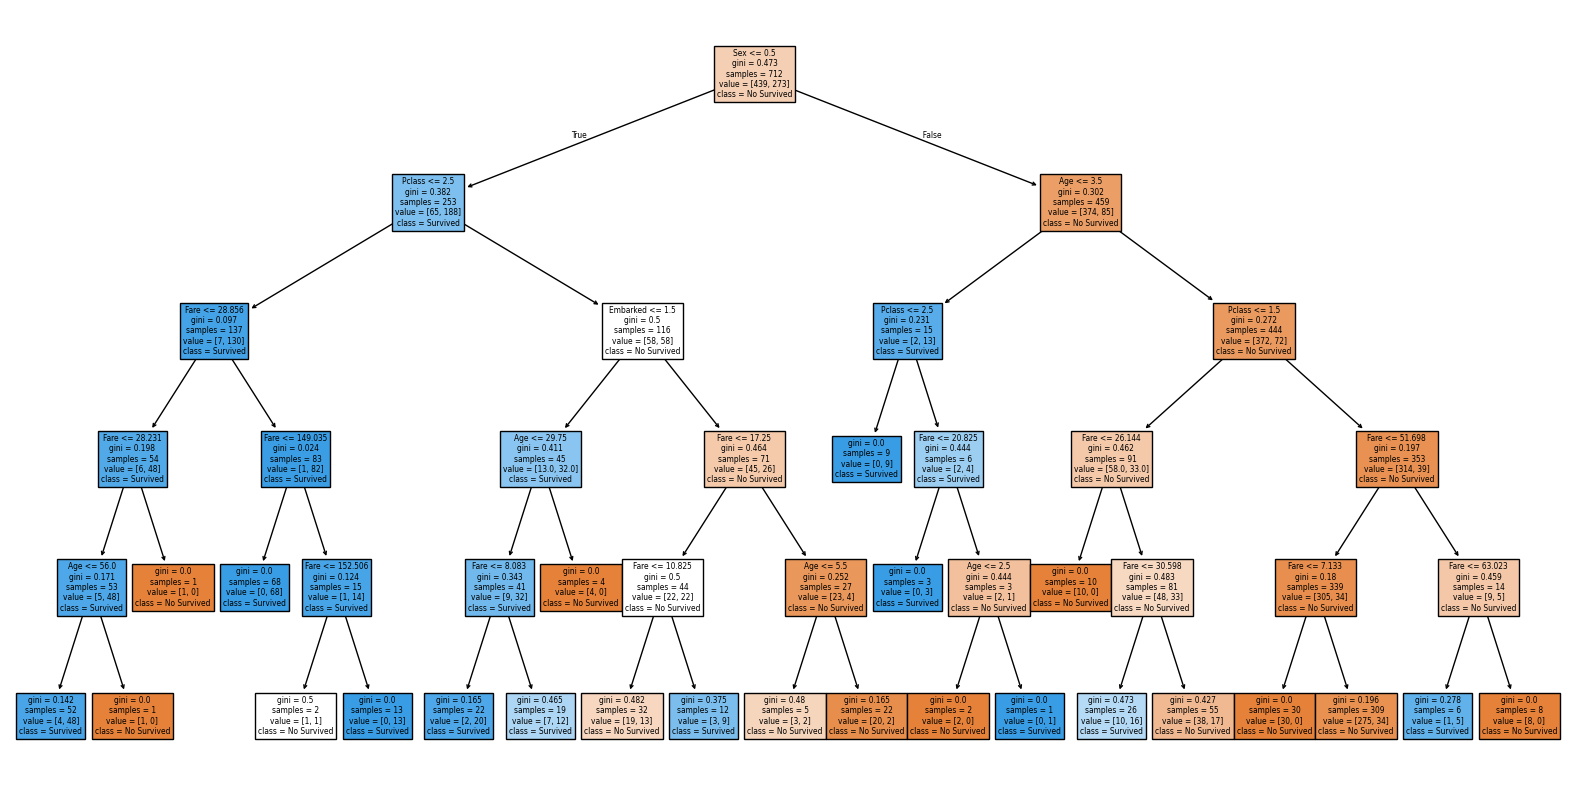

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=features, class_names=['No Survived', 'Survived'], filled=True)
plt.show()


**Evaluación del Modelo:**

In [4]:
y_pred_tree = tree.predict(X_test)
print("Matriz de Confusión - Árbol de Decisión:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_tree))


Matriz de Confusión - Árbol de Decisión:
[[98 12]
 [26 43]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.78      0.62      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



# Random Forest

**Entrenamiento del Modelo:**

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

**Evaluación del Modelo:**

In [6]:
y_pred_rf = rf.predict(X_test)
print("Matriz de Confusión - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Matriz de Confusión - Random Forest:
[[104   6]
 [ 28  41]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.87      0.59      0.71        69

    accuracy                           0.81       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179



**Importancia de las Características:**



In [7]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de las Características:")
for idx in indices:
    print(f"{features[idx]}: {importances[idx]:.4f}")


Importancia de las Características:
Sex: 0.4725
Fare: 0.2032
Pclass: 0.1509
Age: 0.1339
Embarked: 0.0395


**Gráfico de Importancia:**

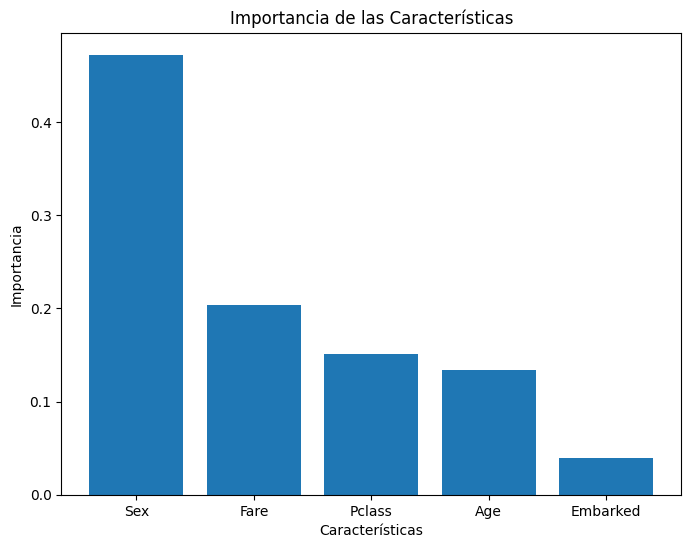

In [8]:
plt.figure(figsize=(8,6))
plt.title('Importancia de las Características')
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


# Gradient Boosting

**Entrenamiento del Modelo:**

In [10]:
!pip3 install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.5 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import xgboost as xgb

# Convertir los datos a la estructura DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir los parámetros
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Entrenar el modelo
xgb_model = xgb.train(params, dtrain, num_boost_round=100)


**Predicciones y Evaluación:**

In [12]:
y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb_binary = [1 if y > 0.5 else 0 for y in y_pred_xgb]

print("Matriz de Confusión - XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb_binary))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_xgb_binary))


Matriz de Confusión - XGBoost:
[[97 13]
 [23 46]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



 ## Ejemplo con LightGBM

In [14]:
!pip3 install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import lightgbm as lgb

# Crear los conjuntos de datos de LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Definir los parámetros
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

# Entrenar el modelo
lgb_model = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval)


**Predicciones y Evaluación:**

In [16]:
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb_binary = [1 if y > 0.5 else 0 for y in y_pred_lgb]

print("Matriz de Confusión - LightGBM:")
print(confusion_matrix(y_test, y_pred_lgb_binary))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_lgb_binary))


Matriz de Confusión - LightGBM:
[[93 17]
 [22 47]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



# Validación Cruzada

**Uso de `cross_val_score`:**

In [17]:
from sklearn.model_selection import cross_val_score

# Modelo a evaluar
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Evaluación con validación cruzada de 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Scores de cada fold:", scores)
print("Accuracy promedio:", scores.mean())


Scores de cada fold: [0.79329609 0.82022472 0.82022472 0.78651685 0.84269663]
Accuracy promedio: 0.8125918021467579


# Validación Cruzada Estratificada

- Mantiene la proporción de clases en cada fold.
- Importante para problemas con clases desbalanceadas.

In [18]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
print("F1-Score de cada fold:", scores)
print("F1-Score promedio:", scores.mean())


F1-Score de cada fold: [0.70866142 0.73770492 0.75       0.66071429 0.77777778]
F1-Score promedio: 0.726971679769537


# Grid Search con Validación Cruzada

**Objetivo:** Encontrar la combinación óptima de hiperparámetros.

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


/Users/alacartaapp/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alacartaapp/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alacartaapp/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/alacartaapp/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/base.py", line 666, in 

**Evaluación del Mejor Modelo:**

In [20]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Informe de Clasificación - Mejor Modelo:")
print(classification_report(y_test, y_pred_best))


Informe de Clasificación - Mejor Modelo:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

